<a href="https://colab.research.google.com/github/Sumitjh26997/CSS581-ML/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1:  After your yearly checkup, the doctor has bad news and good news. The bad news is that you tested positive for a serious disease, and that the test is 99% accurate (i.e., the probability of testing positive given that you have the disease is 0.99, as is the probability of testing negative given that you don’t have the disease). The good news is that this is a rare disease, striking only one in 10,000 people. What are the chances that you actually have the disease? (Show your calculations as well as giving the final result.)**
    

Bayes Theorem helps us calculate the probability of a hypothesis being true, if the evidence is present. This is also known as conditional probability.

Here we want to determine the probability of you having the disease given that you have tested positive i.e. **P(H | E)**.


**P(H)** = Probability that the hypothesis holds, also known as belief. In this case, it is the probability of having the disease, which is 1 in 10,000 = **0.0001**.

**P(E | H)** = Probability we would see the evidence given the hypothesis is true. In this case, probability of of testing positive given that you have the disease, which is 99% = **0.99**.

To calculate **P(H | E)**, we also need :
- **P($\neg$H)** = probability of hypothesis not being true, which in this case is probability of not having the disease i.e. **1 - P(H) = 1 - 0.0001 = 0.9999**

- **P(E | $\neg$H)** = probability we would see the evidence given the hypothesis is not true, which is probability of testing positive given that you don't have the disease i.e. since the test is 99% accurate, there is a 1% chance of a false positive = **0.01**

With this information, we can calculate **P(H | E)**.


$$ P(H | E) = {P(H) * P(E | H) \over P(E)} $$ or
$$ P(H | E) = {P(H) * P(E | H) \over P(H) * P(E | H) + P(\neg H) * P(E | \neg H)} $$

$$ P(H | E) = {0.0001 * 0.99 \over 0.0001 * 0.99 + 0.9999 * 0.01} $$

$$ P(H | E) = {0.000099 \over 0.000099 + 0.009999} $$

$$ P(H | E) = {0.000099 \over 0.010098} $$

$$ P(H | E) = 0.009803 \approx 0.0098 = 0.98\% $$

### So the probability that you have the disease given a the test result is positive is approximately **0.98%**



<br>


<br>


**Q2: Patients make appointments at clinics or hospitals to be checked by a doctor. Some of the patients do not show up for their appointments. This results in loss of valuable resources in terms of physician time and staffing allocation which could have been used more productively. This problem can be posed as a binary classification problem to predict the label of the No-Show class. Labels = {Yes, No}. The data is available through Kaggle. The following set of variables are available for model creation: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show.**

 **Data Website: https://www.kaggle.com/joniarroba/noshowappointmentsLinks to an external site.**

**The goal of this exercise is to do data exploration, model building and evaluation. Create the following models (you do not need to implement these models, almost all major ML libraries have built in models): (i) Logistic Regression (ii) Decision Tree (iii) Random Forest**

**Use cross validation (you can use built in libraries for these also).**


 - **For data exploration, show the distribution of the variables, missing values (if any) and relationship between the predictors and the target variable (33 points)**
 - **Build the prediction model and use 10-fold cross validation (17 points)**
 - **Report the following metrics for your models: Precision, Recall, F-Score, AUC, Plot the ROC curve (20 points)**

## Data Exploration

In [4]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#loading data for exploration
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0.0,0.0,No


In [5]:
#keeping a copy original data for comparison and rollback
og_data = pd.read_csv('KaggleV2-May-2016.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86328 entries, 0 to 86327
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       86328 non-null  float64
 1   AppointmentID   86328 non-null  int64  
 2   Gender          86328 non-null  object 
 3   ScheduledDay    86328 non-null  object 
 4   AppointmentDay  86328 non-null  object 
 5   Age             86328 non-null  int64  
 6   Neighbourhood   86328 non-null  object 
 7   Scholarship     86328 non-null  int64  
 8   Hipertension    86328 non-null  int64  
 9   Diabetes        86328 non-null  int64  
 10  Alcoholism      86328 non-null  int64  
 11  Handcap         86327 non-null  float64
 12  SMS_received    86327 non-null  float64
 13  No-show         86327 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 9.2+ MB


The dataset contains 110,527 rows and 14 columns, associated with medical appointments of patients focused on whether the patient showed up or not

In [7]:
#check if any columns have null values
df.isna().sum().sort_values(ascending=False)

Handcap           1
SMS_received      1
No-show           1
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
dtype: int64

In [8]:
#check if any rows are duplicated in the dataset
df.duplicated().sum()

0

There are no Null values in any of the columns or duplicate rows in the dataset, indicating the quality of data is good based on the initial checks. Let's delve deep into the data to check for specific anomalies

In [9]:
#get quantitative summary of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,8.632800e+04,8.632800e+04,86328.000000,86328.000000,86328.000000,86328.000000,86328.000000,86327.000000,86327.000000
mean,1.473685e+14,5.658643e+06,37.019310,0.098103,0.196333,0.071101,0.029735,0.022218,0.290071
std,2.560971e+14,6.563029e+04,23.102883,0.297455,0.397225,0.256995,0.169857,0.160702,0.453798
min,9.377953e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.196774e+12,5.631746e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.161595e+13,5.667090e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.446672e+13,5.702700e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790452e+06,115.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


Describe doesn't tell us much for any characteristic except for ***Age*** which tells us the mean age and distribution of age of patients and also points out that point out min age is -1, which might be erronous data entry. Also ***Handcap*** is a boolean with possible values of 0 or 1, but the column has a max value of 4.


In [10]:
#investigating Age for erronous data entry
df.Age.value_counts()

0      2832
1      1820
52     1344
49     1279
53     1279
       ... 
97        8
98        5
115       4
100       2
102       1
Name: Age, Length: 102, dtype: int64

There seems to be only one entry where ***Age=-1***

In [11]:
#locating incorrect row
df.loc[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [12]:
#calculate mena age of the dataset
mean_age = df.Age.mean()
#replace invalid age with mean age of the dataset
df.loc[df.Age == -1, 'Age'] = mean_age

This row can either be discarded or the age can be corrected to be replaced by the mean age of patients, which is what is being done in this case

In [13]:
#check if invalid row still exists
df.loc[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<Axes: xlabel='Age'>

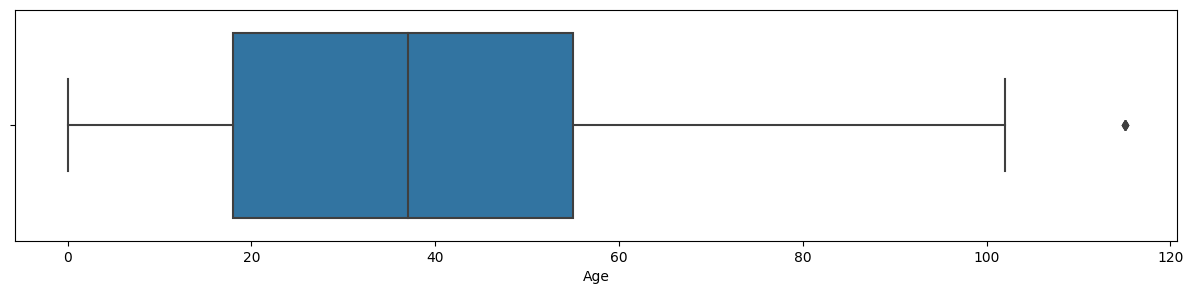

In [14]:
#plot the distribution of age in the dataset
plt.figure(figsize=(15 ,3))
sb.boxplot(x=df.Age)

The distribution graph shows that age is pretty evenly distributed with older people being on the lower end with the majority of patients lying in the age range of >20 and <60. Ages over 100 look like outliers, will be revisited later if they affect accuracy of the model

In [15]:
#investigating Age for erronous data entry
df.Handcap.value_counts()

0.0    84576
1.0     1594
2.0      147
3.0       10
Name: Handcap, dtype: int64

In [16]:
# sample values where Handcap is > 1
df.loc[df.Handcap.isin([2,3,4])]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94.0,BELA VISTA,0,1,1,0,2.0,1.0,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64.0,SANTA MARTHA,0,1,0,1,2.0,1.0,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64.0,SANTA MARTHA,0,1,0,1,2.0,0.0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64.0,SANTA MARTHA,0,1,0,1,2.0,0.0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11.0,ANDORINHAS,0,0,0,0,2.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82778,2.293696e+11,5682907,F,2016-05-11T06:59:30Z,2016-05-13T00:00:00Z,31.0,MATA DA PRAIA,0,0,0,0,2.0,0.0,No
82971,4.785713e+13,5613656,F,2016-04-25T09:32:18Z,2016-05-18T00:00:00Z,33.0,ITARARÉ,0,0,0,0,2.0,0.0,Yes
83318,4.785713e+13,5703326,F,2016-05-16T13:46:50Z,2016-05-19T00:00:00Z,33.0,ITARARÉ,0,0,0,0,2.0,0.0,No
84296,1.861693e+13,5729682,M,2016-05-24T07:44:20Z,2016-06-03T00:00:00Z,11.0,ROMÃO,0,0,0,0,2.0,1.0,No


There are 199 entries where the ***Handcap*** value is outside the bounds of what is described in the data i.e. not a boolean value(0 or 1). Since values > 1 could also mean multiple values, we can standardize these values to 1 as they could represent truthy values.

In [17]:
#replace Handcap values 2,3 and 4 with 1
df.loc[df.Handcap.isin([2,3,4]),'Handcap'] = 1

In [18]:
#check if values have been successfully replaced
df.Handcap.value_counts()

0.0    84576
1.0     1751
Name: Handcap, dtype: int64

Values for Handicap have been corrected

The dataset contains columns for the date of appointment and when the appointment was scheduled, which in itself are not important attributes for classification, but a new feature using these columns can be derived, which is days patient has to wait for an appointment. We can check if more waiting leads to more No-shows, or if there exists some other correlation

Before we create a new column we need to standardize and validate the existing data

In [19]:
#standardize date format
df['ScheduledDate'] = df.ScheduledDay.apply(lambda x: pd.to_datetime(x))
df['AppointmentDate'] = df.AppointmentDay.apply(lambda x: pd.to_datetime(x))
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0.0,0.0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0.0,0.0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0.0,0.0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0.0,0.0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0.0,0.0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00


In [20]:
#calculate waiting period from scheduled date to appointment date
df['waiting_period'] = (df['AppointmentDate'] - df['ScheduledDate']).dt.days
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0.0,0.0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0.0,0.0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0.0,0.0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0.0,0.0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0.0,0.0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1


In [21]:
#check for invalid values
df['waiting_period'].value_counts()

-1      30236
 1       4715
 0       4171
 6       4022
 3       3943
        ...  
 126        1
 150        1
 175        1
 124        1
-7          1
Name: waiting_period, Length: 125, dtype: int64

The number of invalid rows i.e. waiting period = -1 is very high, from the limited amount of data sampled above it seems like the timestamp entered in the system for appointment date is erronous. We need to check if disregarding the timestamp gives better results as ~30% of the data cannot be discarded.

In [22]:
#stabdardize datetime formate removing time
df['ScheduledDate'] = df.ScheduledDay.apply(lambda x: pd.to_datetime(x.split("T")[0]))
df['AppointmentDate'] = df.AppointmentDay.apply(lambda x: pd.to_datetime(x.split("T")[0]))
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0.0,0.0,No,2016-04-29,2016-04-29,-1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0.0,0.0,No,2016-04-29,2016-04-29,-1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0.0,0.0,No,2016-04-29,2016-04-29,-1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0.0,0.0,No,2016-04-29,2016-04-29,-1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0.0,0.0,No,2016-04-29,2016-04-29,-1


In [23]:
#calculate waiting period from scheduled date to appointment date
df['waiting_period'] = (df['AppointmentDate'] - df['ScheduledDate']).dt.days
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0.0,0.0,No,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0.0,0.0,No,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0.0,0.0,No,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0.0,0.0,No,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0.0,0.0,No,2016-04-29,2016-04-29,0


In [24]:
#check if there are still invalid dates
df.loc[df.waiting_period < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
27033,7.839273e+12,5679978,M,2016-05-10T10:51:53Z,2016-05-09T00:00:00Z,38.0,RESISTÊNCIA,0,0,0,0,1.0,0.0,Yes,2016-05-10,2016-05-09,-1
55226,7.896294e+12,5715660,F,2016-05-18T14:50:41Z,2016-05-17T00:00:00Z,19.0,SANTO ANTÔNIO,0,0,0,0,1.0,0.0,Yes,2016-05-18,2016-05-17,-1
64175,2.425226e+13,5664962,F,2016-05-05T13:43:58Z,2016-05-04T00:00:00Z,22.0,CONSOLAÇÃO,0,0,0,0,0.0,0.0,Yes,2016-05-05,2016-05-04,-1
71533,9.982316e+14,5686628,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81.0,SANTO ANTÔNIO,0,0,0,0,0.0,0.0,Yes,2016-05-11,2016-05-05,-6
72362,3.787482e+12,5655637,M,2016-05-04T06:50:57Z,2016-05-03T00:00:00Z,7.0,TABUAZEIRO,0,0,0,0,0.0,0.0,Yes,2016-05-04,2016-05-03,-1


After discarding timestamp, there are 5 rows where Appointment Date is before Scheduled Date - these will be discarded

In [25]:
dfbp = df

In [26]:
#filter out entries with invalid dates
df.drop(df[df.waiting_period < 0].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86323 entries, 0 to 86327
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PatientId        86323 non-null  float64       
 1   AppointmentID    86323 non-null  int64         
 2   Gender           86323 non-null  object        
 3   ScheduledDay     86323 non-null  object        
 4   AppointmentDay   86323 non-null  object        
 5   Age              86323 non-null  float64       
 6   Neighbourhood    86323 non-null  object        
 7   Scholarship      86323 non-null  int64         
 8   Hipertension     86323 non-null  int64         
 9   Diabetes         86323 non-null  int64         
 10  Alcoholism       86323 non-null  int64         
 11  Handcap          86322 non-null  float64       
 12  SMS_received     86322 non-null  float64       
 13  No-show          86322 non-null  object        
 14  ScheduledDate    86323 non-null  datet

In [27]:
type(df)

pandas.core.frame.DataFrame

In [28]:
#check if only valid entries exist
df.loc[df.waiting_period < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period


In [29]:
df = df.reset_index(drop=True)

In [30]:
df.loc[27033, :]

PatientId             117691856291529.0
AppointmentID                   5742075
Gender                                M
ScheduledDay       2016-05-30T07:41:51Z
AppointmentDay     2016-05-30T00:00:00Z
Age                                 7.0
Neighbourhood             SÃO CRISTÓVÃO
Scholarship                           0
Hipertension                          0
Diabetes                              0
Alcoholism                            0
Handcap                             0.0
SMS_received                        0.0
No-show                              No
ScheduledDate       2016-05-30 00:00:00
AppointmentDate     2016-05-30 00:00:00
waiting_period                        0
Name: 27033, dtype: object

No invalid rows where appointment date < scheduled date exist in the dataset

We can check the gender split in the data and if it affects the % of No-shows. Based on just value counts, the dataset contains **64% female and 36% male patients**

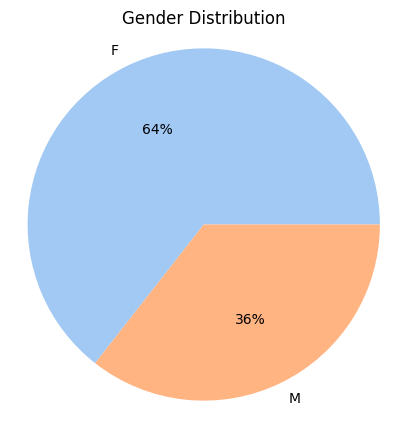

In [31]:


gender_counts = df.groupby('Gender')['PatientId'].nunique()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [32]:
df.loc[df.Gender =='F']['No-show'].value_counts()

No     44348
Yes    11692
Name: No-show, dtype: int64

Out of the 71,837 female patient records, 14,591 appointments are no-shows i.e. **~20.31%**.

In [33]:
df.loc[df.Gender =='M']['No-show'].value_counts()

No     24161
Yes     6121
Name: No-show, dtype: int64

Out of the 38,685 male patient records, 7,723 appointments are no-shows i.e. **~19.96%**.

#### Hence the % of no shows across gender is relatively the same.

<Axes: xlabel='Gender', ylabel='percent'>

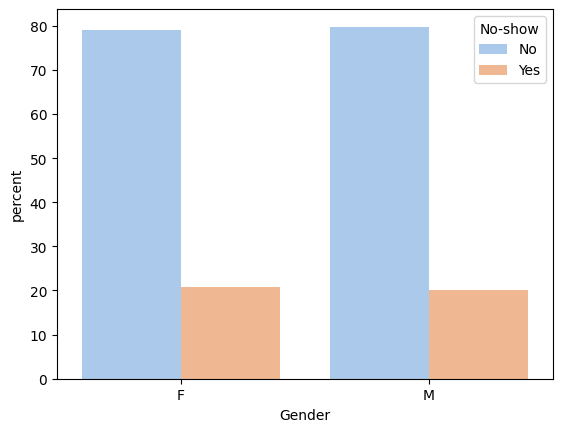

In [34]:
x,y = 'Gender', 'No-show'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.barplot,'data'), x=x,y='percent',hue=y, palette=sb.color_palette("pastel")))

Representing the same information visually just confirms the above numbers

Plotting no-shows by neighbourhoods doesn't provide any useful insight as there is no way to directly co-relate the neighbourhood by distance or any other metric to the hospital which would contribute to a higher or lower rate of no-shows.

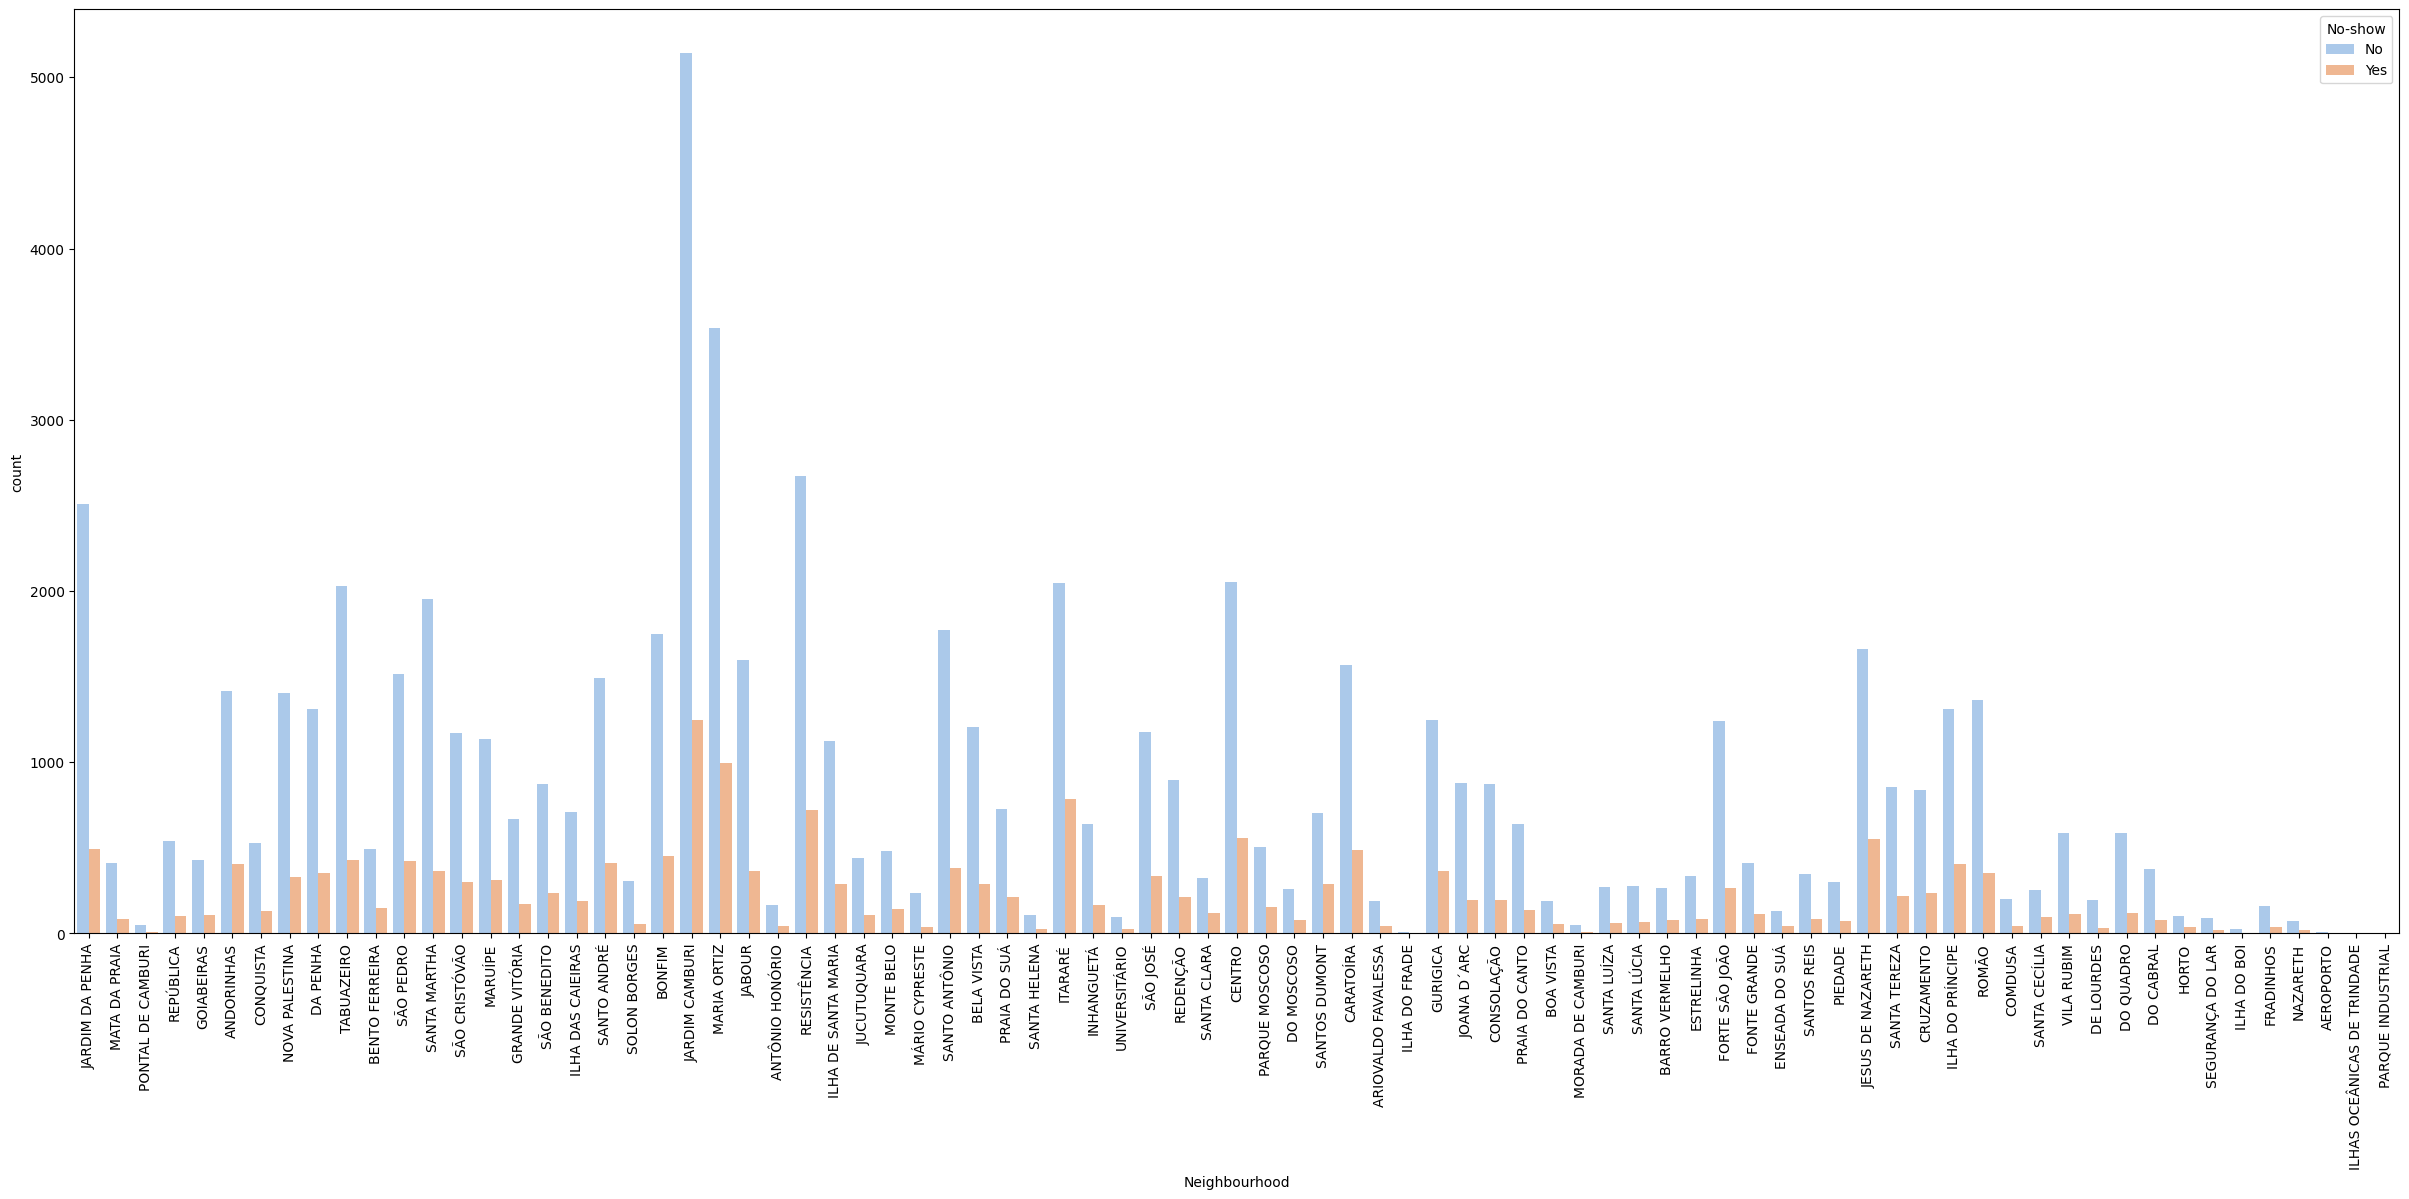

In [35]:
#plot no of no-shows against neighbourhoods
plt.figure(figsize=(30,12))
fig = sb.countplot(x='Neighbourhood',hue='No-show',data=df, palette=sb.color_palette("pastel"))
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

Schloarship which represents if a patient is covered under the Bolsa Familia welfare scheme can also be checked to see if it has an effect of the % of no-shows.

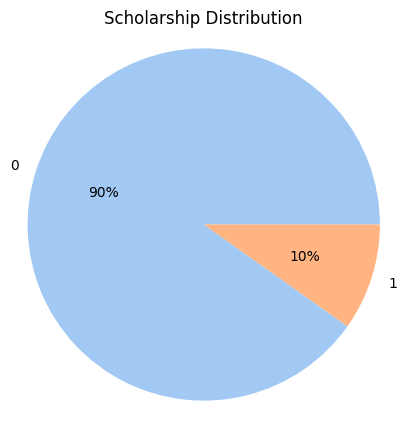

In [36]:
#get no. of appointments covered under the scheme
sch_counts = df.Scholarship.value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sch_counts, labels=sch_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
plt.title('Scholarship Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Based on the above only **10%** of the total appointments were covered under the scheme. Here the no. of unique patients was not considered as in gender, as one patient could be covered and not covered for different instances of time in the dataset

<Axes: xlabel='Scholarship', ylabel='percent'>

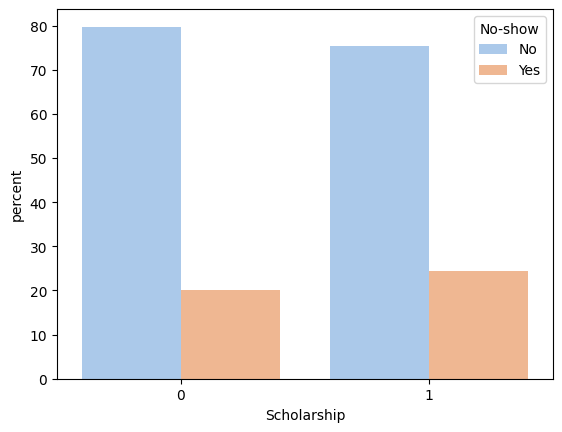

In [37]:
x,y = 'Scholarship', 'No-show'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.barplot,'data'), x=x,y='percent',hue=y, palette=sb.color_palette("pastel")))

Similarly, rates of no-shows for scholarship has almost no difference with the rate skewing slighlty higher for patients with scholarship

We can also look at the diseases to see if they have any effect on the % of No-shows regardless of any other attribute like age or gender. Just based on the disease distrbution among patients during their appointments only **7% were positive for diabetes**, **3% were alcoholics** and **2% were handicapped**. The most prevalent condition in patients was **hypertension at 20%**

(-1.0999999299343999,
 1.0999999966635428,
 -1.0999998262433774,
 1.0999999801495235)

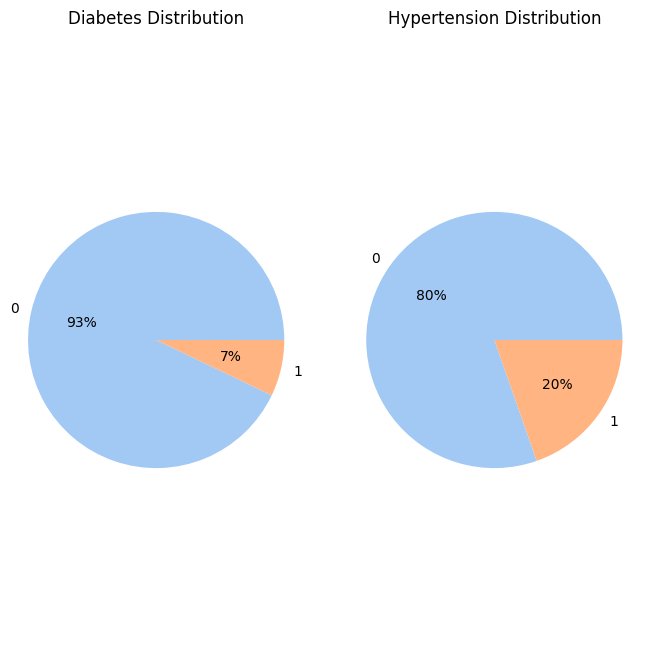

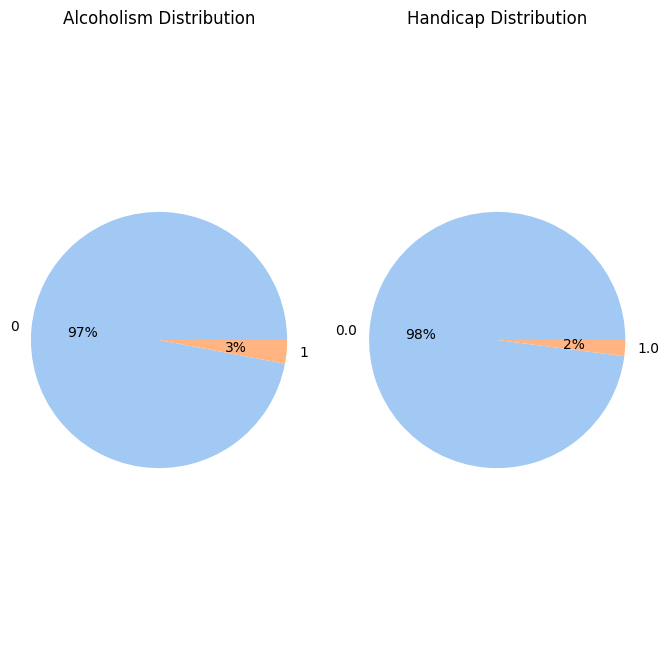

In [38]:
#get no. of appointments covered under the scheme
diab_counts = df.Diabetes.value_counts()
hiper_counts = df.Hipertension.value_counts()
alc_counts = df.Alcoholism.value_counts()
handcap_counts = df.Handcap.value_counts()

fig, (pd,ph) = plt.subplots(1,2,figsize=(8,8)) #pd, ph refer to your two pies

# Create a pie chart
pd.pie(diab_counts, labels=diab_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
pd.set_title('Diabetes Distribution')
pd.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a pie chart
ph.pie(hiper_counts, labels=hiper_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
ph.set_title('Hypertension Distribution')
ph.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


fig, (pa,pha) = plt.subplots(1,2,figsize=(8,8)) #pa, pha refer to your two pies

# Create a pie chart
pa.pie(alc_counts, labels=alc_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
pa.set_title('Alcoholism Distribution')
pa.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a pie chart
pha.pie(handcap_counts, labels=handcap_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
pha.set_title('Handicap Distribution')
pha.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


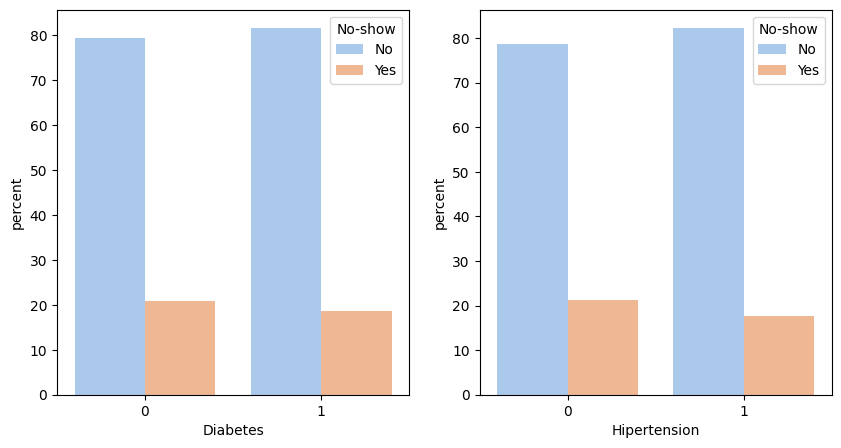

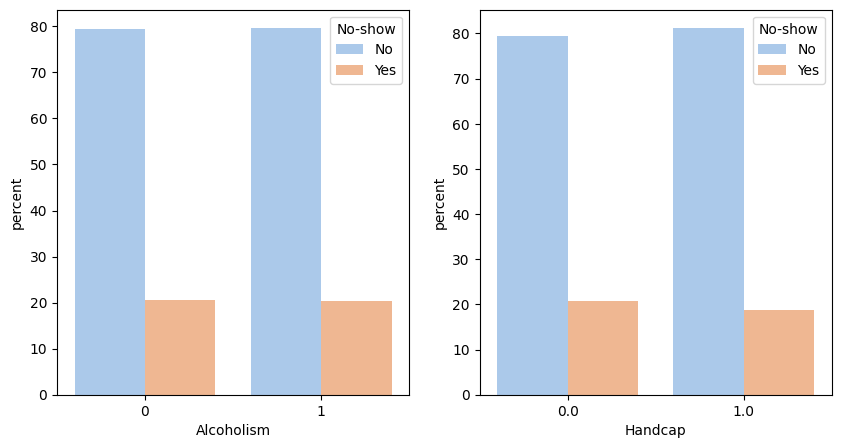

In [39]:
def plot_percent(feature, graph_reference):
    x,y = feature, 'No-show'

    (df
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sb.barplot,'data'), x=x,y='percent', hue=y, palette=sb.color_palette("pastel"), ax=graph_reference))


fig, (pd,ph) = plt.subplots(1,2,figsize=(10,5)) #ax1,ax2 refer to your two pies
plot_percent('Diabetes', pd)
plot_percent('Hipertension', ph)


fig, (pa,pha) = plt.subplots(1,2,figsize=(10,5)) #ax1,ax2 refer to your two pies
plot_percent('Alcoholism', pa)
plot_percent('Handcap', pha)

As clearly seen in the graphs, having a handicap or other conditions doesn't affect the no-show rate, people with at least are almost just as likely to miss an appointment as people without a condition

Another distribution to be checked is the SMS_Recieved field, which potentially indicates if the patient was reminded of the appointment via SMS

<Axes: xlabel='SMS_received', ylabel='percent'>

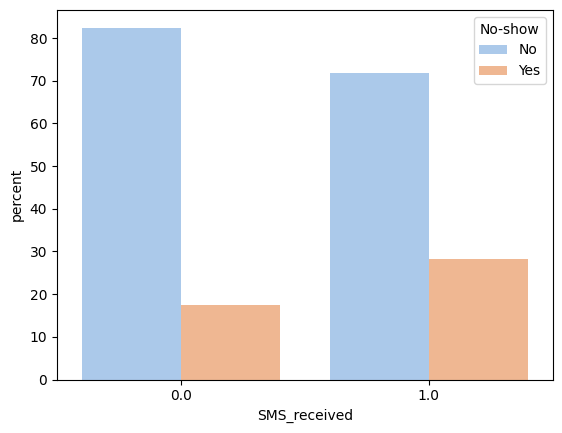

In [40]:
x,y = 'SMS_received', 'No-show'

(og_data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.barplot,'data'), x=x,y='percent',hue=y, palette=sb.color_palette("pastel")))

Based on the data we can see that patients that were contacted by SMS were more likely to not show up for their appointments i.e. suggesting a negative coorelation

## Modelling

Before we build our models, we need to check feature importance and standardize our data.


We need to check what does the correlation between all available features
For the same we need all numeric values, hence converting ***No-show*** to numberic values (No to 0 and Yes to 1)

In [41]:
# converting No-show to 0 and 1
corr_data = df
corr_data['No-show']= df['No-show'].replace('No', 0)
corr_data['No-show']= df['No-show'].replace('Yes', 1)
corr_data['No-show'].value_counts()

0.0    68509
1.0    17813
Name: No-show, dtype: int64

In [42]:
#rearrange columns to keep dependent varaible i.e. No-show at the end
list(corr_data.columns.values)
corr_data = corr_data[['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDate',
 'AppointmentDate',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'waiting_period',
 'No-show',
]]

In [43]:
#calculate correlation matrix
corr_matrix = corr_data.corr()
corr_matrix['No-show']

<ipython-input-43-11bbef251844>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_data.corr()


PatientId        -0.001706
AppointmentID    -0.169237
Age              -0.061903
Scholarship       0.031312
Hipertension     -0.035060
Diabetes         -0.014548
Alcoholism       -0.001131
Handcap          -0.006484
SMS_received      0.119010
waiting_period    0.188394
No-show           1.000000
Name: No-show, dtype: float64

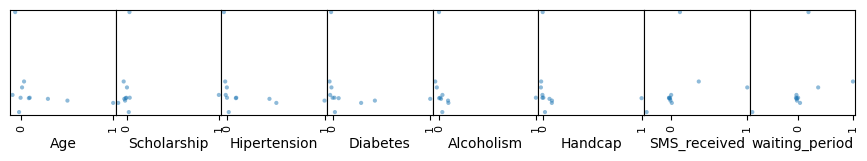

In [45]:
#plot scatter matrix for correlation matrix
from pandas.plotting import scatter_matrix
axes = scatter_matrix(corr_matrix, figsize=(15, 15))

#set visibility of all elements except No-show to False
for i in range(np.shape(axes)[0] - 1):
    for j in range(np.shape(axes)[1]):
        axes[i,j].set_visible(False)

#disregard patientId and appointmentID and no-show itself
axes[10,0].set_visible(False)
axes[10,1].set_visible(False)
axes[10,10].set_visible(False)

<Axes: >

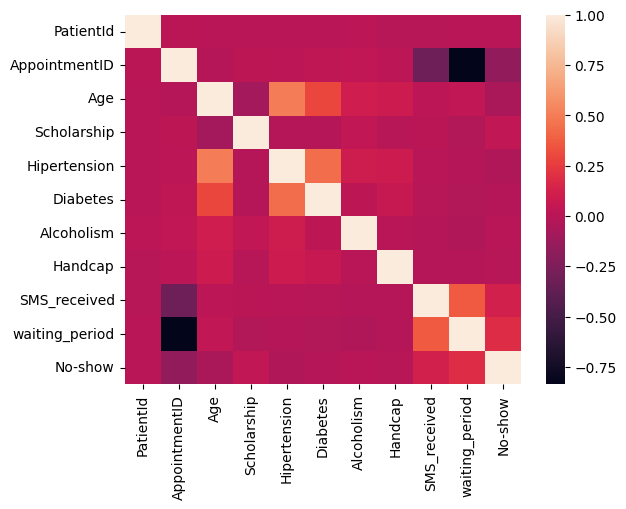

In [46]:
import seaborn as sb
sb.heatmap(corr_matrix)

Based on the above visualizations, heatmap is much better at providing the simplicity and clarity required to read the complex correlation matrix.

Focusing on our dependent variable i.e. No-show, we can see that patientID and appointmentID can be disregarded as they are system generated numbers and do not have any correlation with the target variable.

Further, all attributes except SMS_received and waiting_period have little to no correlation with No-show.

In [47]:
#only select relevant columns in final feature set
final_data = df[[
 'Gender',
 'Age',
 'Neighbourhood',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'waiting_period',
 'No-show',
]]

final_data.head(25)

,Gender,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,waiting_period,No-show
0,F,62.0,JARDIM DA PENHA,1,0,0,0.0,0.0,0,0.0
1,M,56.0,JARDIM DA PENHA,0,0,0,0.0,0.0,0,0.0
2,F,62.0,MATA DA PRAIA,0,0,0,0.0,0.0,0,0.0
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0.0,0.0,0,0.0
4,F,56.0,JARDIM DA PENHA,1,1,0,0.0,0.0,0,0.0
5,F,76.0,REPÚBLICA,1,0,0,0.0,0.0,2,0.0
6,F,23.0,GOIABEIRAS,0,0,0,0.0,0.0,2,1.0
7,F,39.0,GOIABEIRAS,0,0,0,0.0,0.0,2,1.0
8,F,21.0,ANDORINHAS,0,0,0,0.0,0.0,0,0.0
9,F,19.0,CONQUISTA,0,0,0,0.0,0.0,2,0.0


In [48]:
from sklearn.preprocessing import OrdinalEncoder

y = final_data["No-show"]
X = final_data[['Gender',
 'Age',
 'Neighbourhood',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'waiting_period']]

ordinal_encoder =  OrdinalEncoder(handle_unknown='error')
ordinal_encoder.fit(X)
X = ordinal_encoder.fit_transform(X)

In [ ]:
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold(random_state=42)
X_res, y_res = iht.fit_resample(X, y)

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import KFold

# initialize all models with necessary hyperparams
decision_tree = tree.DecisionTreeClassifier(max_depth = 7)
random_forest = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=1)
logistic_regressor = LogisticRegression(max_iter=1000)

#generate k=10 splits of the data
kf = KFold(n_splits=10)
kf.get_n_splits(X)

for train_index,test_index in kf.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    print('DT Accuracy Score: ', accuracy_score(y_test, y_pred)*100)
    print('DT F1 Score: ',f1_score(y_test, y_pred, zero_division=1)*100)
    print('DT Recall Score: ',recall_score(y_test, y_pred, zero_division=1)*100)
    print('DT Precision Score: ',precision_score(y_test, y_pred, zero_division=1)*100)

    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    print('RF Accuracy Score: ', accuracy_score(y_test, y_pred_rf)*100)
    print('RF F1 Score: ',f1_score(y_test, y_pred_rf, zero_division=1)*100)
    print('RF Recall Score: ',recall_score(y_test, y_pred_rf, zero_division=1)*100)
    print('RF Precision Score: ',precision_score(y_test, y_pred_rf, zero_division=1)*100)


    logistic_regressor.fit(X_train,y_train)
    y_pred_lr = logistic_regressor.predict(X_test)
    print('LR Accuracy Score: ', accuracy_score(y_test, y_pred_lr)*100)
    print('LR F1 Score: ',f1_score(y_test, y_pred_lr, zero_division=1)*100)
    print('LR Recall Score: ',recall_score(y_test, y_pred_lr, zero_division=1)*100)
    print('LR Precision Score: ',precision_score(y_test, y_pred_lr, zero_division=1)*100)


In [ ]:
#create train-test split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import KFold

decision_tree = tree.DecisionTreeClassifier(max_depth = 7)
random_forest = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=1)
logistic_regressor = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=10)
kf.get_n_splits(X_res)

for train_index,test_index in kf.split(X_res):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_res[train_index], X_res[test_index], y_res[train_index], y_res[test_index]

    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    print('DT Accuracy Score: ', accuracy_score(y_test, y_pred)*100)
    print('DT F1 Score: ',f1_score(y_test, y_pred, zero_division=1)*100)
    print('DT Recall Score: ',recall_score(y_test, y_pred, zero_division=1)*100)
    print('DT Precision Score: ',precision_score(y_test, y_pred, zero_division=1)*100)

    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    print('RF Accuracy Score: ', accuracy_score(y_test, y_pred_rf)*100)
    print('RF F1 Score: ',f1_score(y_test, y_pred_rf, zero_division=1)*100)
    print('RF Recall Score: ',recall_score(y_test, y_pred_rf, zero_division=1)*100)
    print('RF Precision Score: ',precision_score(y_test, y_pred_rf, zero_division=1)*100)

    logistic_regressor.fit(X_train,y_train)
    y_pred_lr = logistic_regressor.predict(X_test)
    print('LR Accuracy Score: ', accuracy_score(y_test, y_pred_lr)*100)
    print('LR F1 Score: ',f1_score(y_test, y_pred_lr, zero_division=1)*100)
    print('LR Recall Score: ',recall_score(y_test, y_pred_lr, zero_division=1)*100)
    print('LR Precision Score: ',precision_score(y_test, y_pred_lr, zero_division=1)*100)


<br><br>

**Q3: Suppose the distribution of length of stay of patients in a hospital is given by the graph below. You are given the task to predict the length of stay. How would you change the problem from a regression problem to a binary classification problem?**

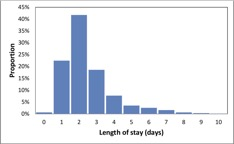

The provided graph represents the distribution of length of stay in days ranging from 0 to 10 on the x-axis. While the y-axis represents the proprotion of patients, for the given length of stay. The length of stay piques in terms of proportion of patients at 2 days, before gradually declining.

To convert this from a regression to a binary classification problem, we can divide the length of stay in 2 categories: **short stay** and **long stay**. In order to do this, we can decide on a threshold value which act as a reference value to classify a stay as short or long. The threshold can be selected as either the mean or median of the data, or based on some medical or other considerations that can be obntained from deeper analysis of the data.

Once the threshold is decided, appropriate labels can be added to the data to split the data into the two groups.

Finally, we can use any of the models available at our disposal to predict whether a patient will have a short or long stay such as decision tree, random forest or logistic regression, especially if the decision boundary is clearly defined. If the data is not spearable linearly, in that case methods like clustering and SVM can also be used.